<center> <H1>SCALE INVARIANT FEATURE TRANSFORM</H1></center>

In [11]:
import cv2 as cv
from matplotlib import pyplot as plt

The major stages for SIFT computations used:
1) Scale-Space Extrema detection
2) Keypoints localization
3) Orientation assignement
4) Keypoint Descriptor

#  SIFT detector 

In [12]:

#read a query
licence_plate = cv.imread('Project\queries\matricule4.png')
licence_plate = cv.cvtColor(licence_plate, cv.COLOR_BGR2RGB)
licencePlate_gray = cv.cvtColor(licence_plate, cv.COLOR_RGB2GRAY)

#initializing SIFT feature detector and detecting keypoints and descriptors
sift = cv.SIFT_create()

plate_keypoints, plate_descriptors = sift.detectAndCompute(licencePlate_gray,None)
print('Number of keypoints : ',len(plate_keypoints))
print('number of descriptors in each keypoint:',plate_descriptors.shape[1])

Number of keypoints :  155
number of descriptors in each keypoint: 128


In [13]:
print('Example of one extracted Keypoint characteristics:')
print('x,y ',plate_keypoints[10].pt)
print('size:',plate_keypoints[10].size)
print('angle:',plate_keypoints[10].angle)
print('response:',plate_keypoints[10].response)
print('class_id:',plate_keypoints[10].class_id)
print('octave:',plate_keypoints[10].octave)

Example of one extracted Keypoint characteristics:
x,y  (21.180644989013672, 134.6555938720703)
size: 1.8854697942733765
angle: 327.42901611328125
response: 0.03759145364165306
class_id: -1
octave: 3539455


In [14]:
# the discriptor of one keypoint
#plate_descriptors[0]


In [15]:
#plt.title('Histogram of Oriented Direction for keypoint 1')
#plt.xlabel('Orientation (degree)')
#sns.histplot(data=plate_descriptors[0], binwidth=17,bins=8)

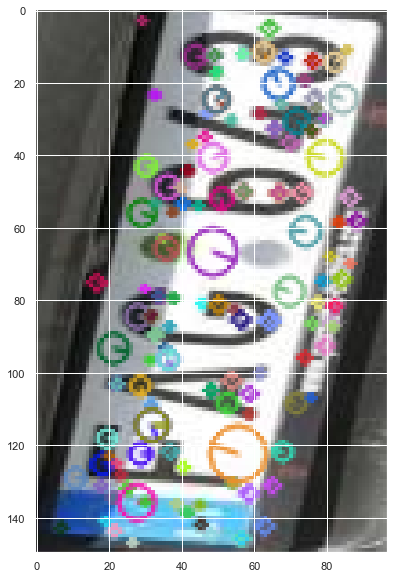

In [16]:
#drawing keypoints

plate_features  = cv.drawKeypoints(licence_plate, plate_keypoints, None ,flags = cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.imshow(plate_features)

In [17]:

#calculating keypoints and descriptor for the car image
def MatchFeatures(gray_image):
    car_keypoints, car_descriptor = sift.detectAndCompute(gray_image, None)

    #car_features = cv.drawKeypoints(car, car_keypoints, None, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    bf = cv.BFMatcher()
    matches = bf.knnMatch(plate_descriptors,car_descriptor, k=2)

    good_features = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
          good_features.append([m])
    
    #we check if the number of good features is above 10
    return good_features, car_keypoints
        
  



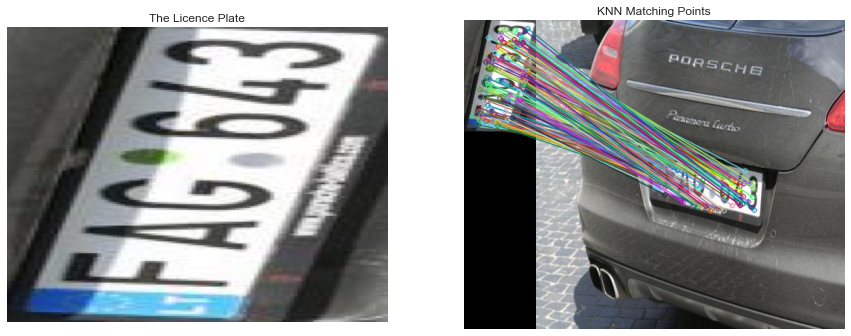

In [18]:
import os
# Load the test image
folder_dir = "project/License Plates"


for images in os.listdir(folder_dir):
    image = cv.imread(os.path.join(folder_dir, images))
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

    good_features, car_keypoints = MatchFeatures(image_gray)
    if(len(good_features) < 10):
        continue
    else:
        matched_car = image # the car image with the matching licence plate
        break

if(matched_car.any() != None):

    comparaison = cv.drawMatchesKnn(licence_plate, plate_keypoints, matched_car, car_keypoints, good_features,None, flags = 2)
    # Display the best matching points
    fig ,(ax1,ax2) = plt.subplots(1,2, figsize =(15,15) )
    
    ax1.axis('off')
    ax2.axis('off')

    
    ax1.imshow(licence_plate,)
    ax1.set_title("The Licence Plate")
    ax1.set_aspect(0.5)
    plt.title('KNN Matching Points')
    ax2.imshow(comparaison)
    plt.show()
   
else:
    print("empty !")